# <div style="text-align: center; background-color: #0C6A86; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">🏠EDA on House Rent Prediction Dataset</div>

 <img src="WhatsApp Image 2022-09-07 at 6.53.43 PM.jpeg" style=" display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%; ">


<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset📁</h3>


<h4>House Rent Prediction Dataset contains <mark>12 columns</mark>, each are:</h4>
<p><b>BHK</b>: Number of Bedrooms, Hall, Kitchen.</p>
<p><b>Rent</b>: Rent of the Houses/Apartments/Flats.
<p><b>Size</b>: Size of the Houses/Apartments/Flats in Square Feet.
<p><b>Floor</b>: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
<p><b>Area Type</b>: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
<p><b>Area Locality</b>: Locality of the Houses/Apartments/Flats.
<p><b>City</b>: City where the Houses/Apartments/Flats are Located.
<p><b>Furnishing Status</b>: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
<p><b>Tenant Preferred</b>: Type of Tenant Preferred by the Owner or Agent.
<p><b>Bathroom</b>: Number of Bathrooms.
<p><b>Point of Contact</b>: Whom should you contact for more information regarding the Houses/Apartments/Flats

<h3 style="text-align: left;background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">Preprocessing Part</h3>


* [Import Packages and Define Useful Functions](#1)
* [Cleaning Data](#2)
#### Analysis Part
* [plotting and visualization](#0.1)
* [WordCloud on Area Locality](#0.3)

<h3 id ="1" style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Import Packages and Define Useful Functions🔎</h3>

In [56]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import missingno as msno
import country_converter as coco
from wordcloud import WordCloud
import nltk

In [2]:
df=pd.read_csv('House_Rent_Dataset.csv')
df.tail()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [35]:
def get_histogram(df,col_name):
        
    fig=px.histogram(
        x=df[col_name],
        color_discrete_sequence=px.colors.sequential.Viridis,
        template='plotly_dark',
        text_auto=True
        
        ).update_xaxes(categoryorder='total descending')
    fig.show()


In [36]:
def get_pie(df,col_name):

    fig = px.pie(values=df[col_name].value_counts().values, 
             names=df[col_name].value_counts().index, 
             color_discrete_sequence=px.colors.sequential.Viridis,
             template='plotly_dark'
             )
    fig.update_traces(textinfo='label+percent+value', textfont_size=13 )
    fig.show()



<h3 id="2" style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">🗑Cleaning Data</h3>

<AxesSubplot:>

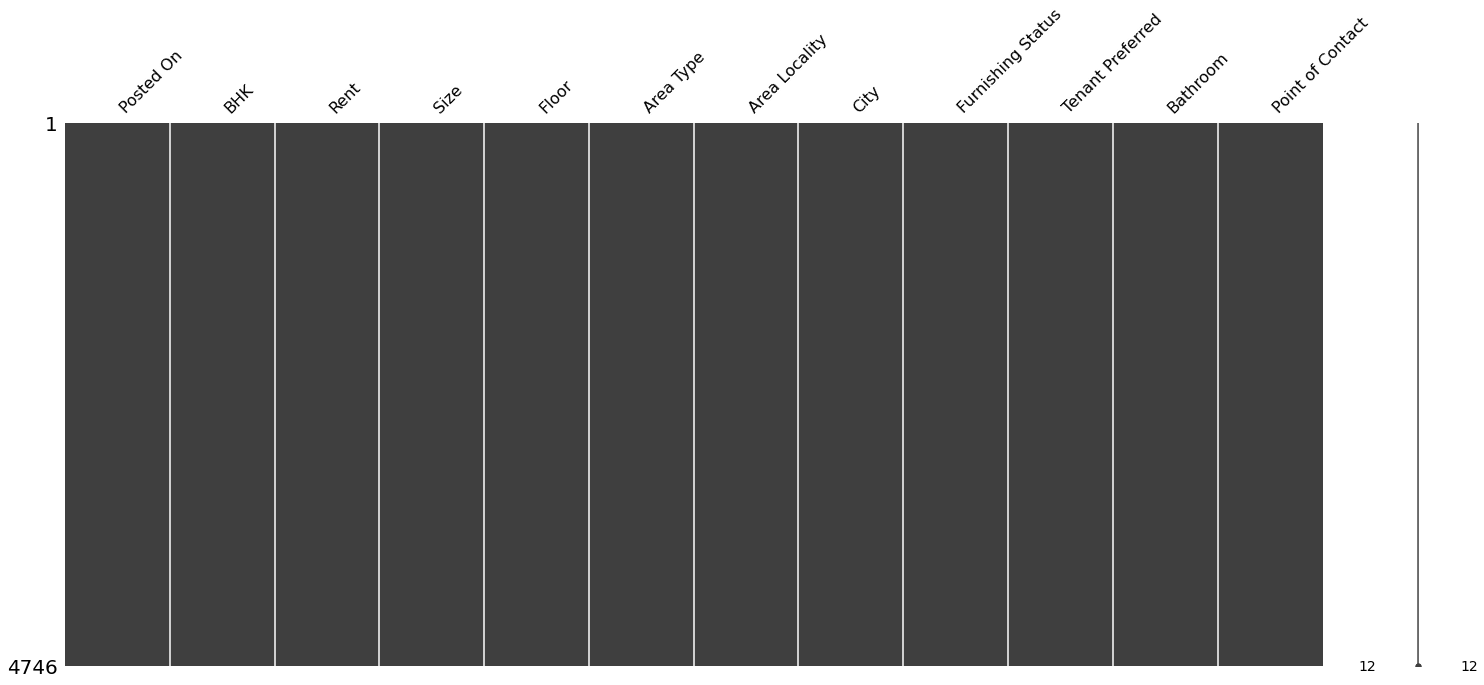

In [3]:
msno.matrix(df)


In [4]:
df.shape

(4746, 12)

In [5]:
print(df.info())
print ('=' *50 )
print(df.describe())
print('='*50)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
s

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
# Splitting posted on column and creating new variables
df['Post_Day'] = df['Posted On'].apply(lambda x: x.split('-')[2]).str.lstrip('0')
df['Post_Month'] = df['Posted On'].apply(lambda x: x.split('-')[1]).str.lstrip('0')
df['Floor Level']=df['Floor'].apply(lambda x: x.split('out of')[0])
df['total floor']=df['Floor'].apply(lambda x: x.split('out of')[-1])
df.drop(['Floor','Posted On'],axis=1,inplace= True)
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Post_Day,Post_Month,Floor Level,total floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,18,5,Ground,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,13,5,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16,5,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5,1,2


In [7]:
df['Point of Contact']=df['Point of Contact'].apply(lambda x: x.split(' ')[-1])
df['Point of Contact']=df['Point of Contact'].apply(lambda x:'Owner' if x=='Builder' else x)
df['Point of Contact'].head()

0    Owner
1    Owner
2    Owner
3    Owner
4    Owner
Name: Point of Contact, dtype: object

In [8]:

df['Floor Level']=df['Floor Level'].apply(lambda x: 0 if x =='Ground'or x=='Ground 'or x=='Upper Basement ' or x=='Lower Basement ' else x)
                              
df.head()


,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Post_Day,Post_Month,Floor Level,total floor
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Owner,18,5,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Owner,13,5,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Owner,16,5,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Owner,4,7,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,9,5,1,2


In [10]:
df['Floor Level'].value_counts().index


Index([ '1 ',     0,  '2 ',  '3 ',  '4 ',  '5 ',  '6 ',  '7 ', '10 ',  '8 ',
        '9 ', '12 ', '11 ', '15 ', '14 ', '18 ', '17 ', '16 ', '19 ', '13 ',
       '20 ', '25 ', '23 ', '21 ', '24 ', '30 ', '28 ', '34 ', '26 ', '32 ',
       '27 ', '60 ', '65 ', '22 ', '35 ', '48 ', '45 ', '36 ',   '1', '40 ',
       '53 ', '44 ', '41 ', '46 ', '33 ', '37 ', '50 ', '39 ', '29 ', '49 ',
       '43 ', '76 ',   '3', '47 '],
      dtype='object')

In [9]:
df['Floor Level']=pd.to_numeric(df['Floor Level'])
df['Floor Level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4746 entries, 0 to 4745
Series name: Floor Level
Non-Null Count  Dtype
--------------  -----
4746 non-null   int64
dtypes: int64(1)
memory usage: 37.2 KB


<h3 id="0.2" style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> 📊plotting and visualization</h3>

In [37]:
get_pie(df,'City')
get_histogram(df,'City')

In [38]:
get_pie(df,'Furnishing Status')
get_histogram(df,'Furnishing Status')


In [42]:
get_pie(df,'Tenant Preferred')
get_histogram(df,'Furnishing Status')

In [41]:
get_pie(df,'Area Type')
get_histogram(df,'Furnishing Status')

In [40]:

get_pie(df,'Point of Contact')
get_histogram(df,'Furnishing Status')

In [39]:
get_pie(df,'Post_Month')
get_histogram(df,'Furnishing Status')

In [45]:
C = df['City'].unique().tolist()
avg_rent = [df['Rent'].loc[df['City']==i].sum()/df['Rent'].loc[df['City']==i].shape[0] for i in C]

px.bar(x=C, y=avg_rent, color=avg_rent, color_continuous_scale='jet',template = 'plotly_dark',text_auto = True)




<h3 id ="0.3"style="text-align: left; background-color: #128EB3; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">WordCloud on Area Locality</h3>

In [51]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()


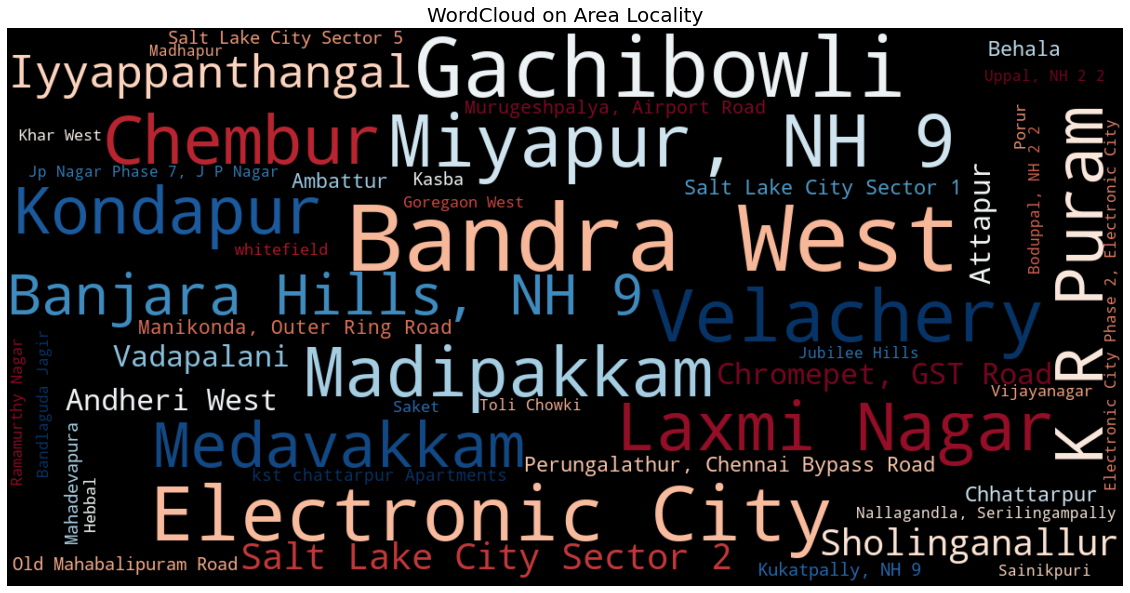

In [59]:

freq_df = Freq_df(df['Area Locality'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud on Area Locality')
